## Description  

* datetime - hourly data + timestamp
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather
        1. clear, Few clouds, Partly cloudy, Partly cloudy
        2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* winspped - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

### Evaluation
Submissions are evaluated on the Root Mean Squared Logarithmic Error (RMSLE)

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처

mpl.rcParams['axes.unicode_minus'] = False

In [3]:
from dfply import *
from plotnine import *

In [5]:
train_df = pd.read_csv("bike/train.csv", parse_dates=["datetime"])
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
train_df.shape

(10886, 12)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [12]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [14]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

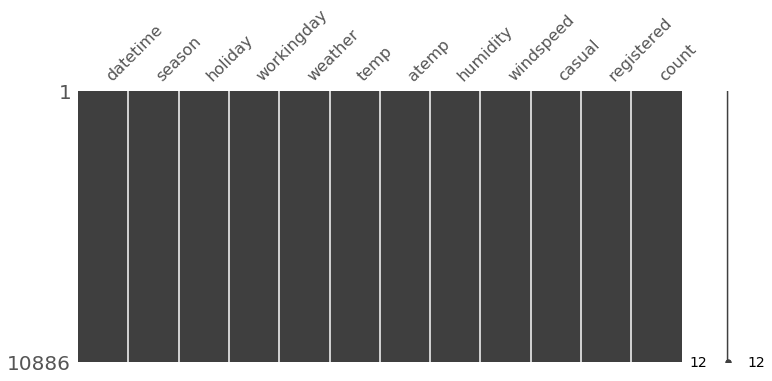

In [16]:
import missingno as msno
msno.matrix(train_df, figsize=(12,5))

In [17]:
train_df["year"] = train_df["datetime"].dt.year
train_df["month"] = train_df["datetime"].dt.month
train_df["day"] = train_df["datetime"].dt.day
train_df["hour"] = train_df["datetime"].dt.hour
train_df["minute"] = train_df["datetime"].dt.minute
train_df["second"] = train_df["datetime"].dt.second
train_df.shape

(10886, 18)

In [18]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


c:\python3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


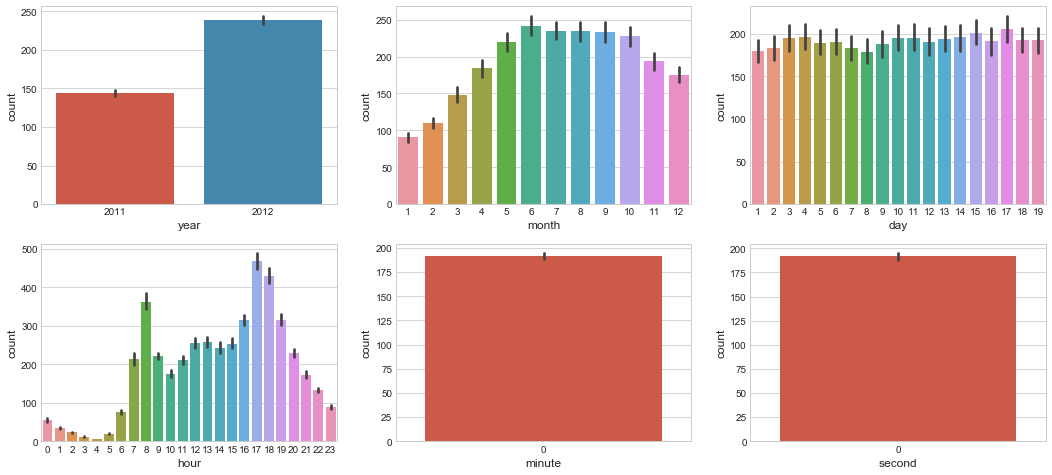

In [40]:
sns.set_style("whitegrid")

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train_df, x="year", y="count", ax=ax1)
sns.barplot(data=train_df, x="month", y="count", ax=ax2)
sns.barplot(data=train_df, x="day", y="count", ax=ax3)
sns.barplot(data=train_df, x="hour", y="count", ax=ax4)
sns.barplot(data=train_df, x="minute", y="count", ax=ax5)
sns.barplot(data=train_df, x="second", y="count", ax=ax6)

###  # of bike rent at commuting hours (8, 17,18) high 

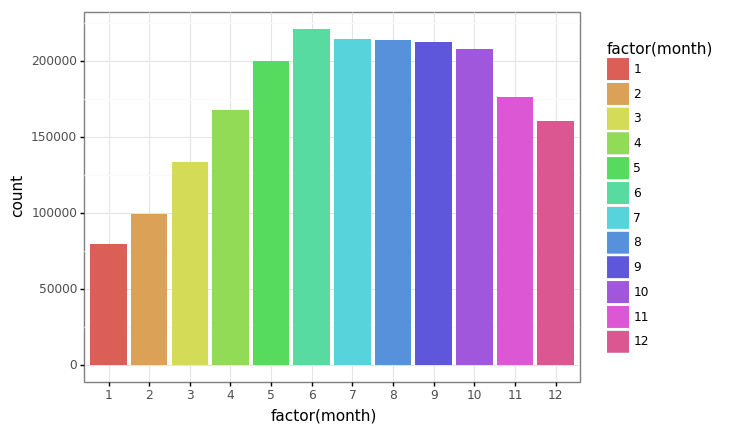

<ggplot: (-9223371899678581325)>

In [28]:
(ggplot(train_df, aes("factor(month)", "count", fill="factor(month)")) + geom_bar(stat="identity")) + theme_bw()

c:\python3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


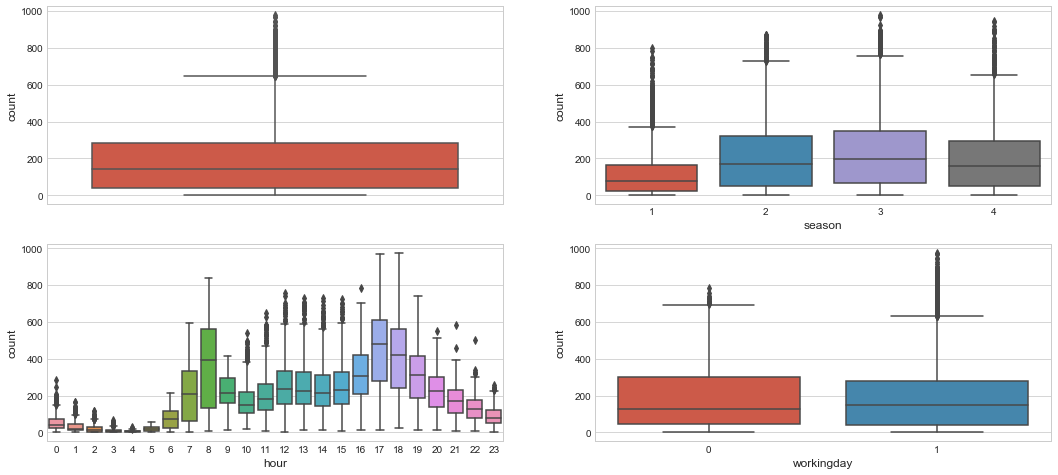

In [38]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)


sns.boxplot(data=train_df, y="count", orient='v', ax=ax1)
sns.boxplot(data=train_df, y="count", x='season', ax=ax2)
sns.boxplot(data=train_df, y='count', x='hour', ax=ax3)
sns.boxplot(data=train_df, y='count', x='workingday', ax=ax4)

In [42]:
train_df['dayofweek'] = train_df["datetime"].dt.dayofweek
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [44]:
train_df['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

c:\python3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
c:\python3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


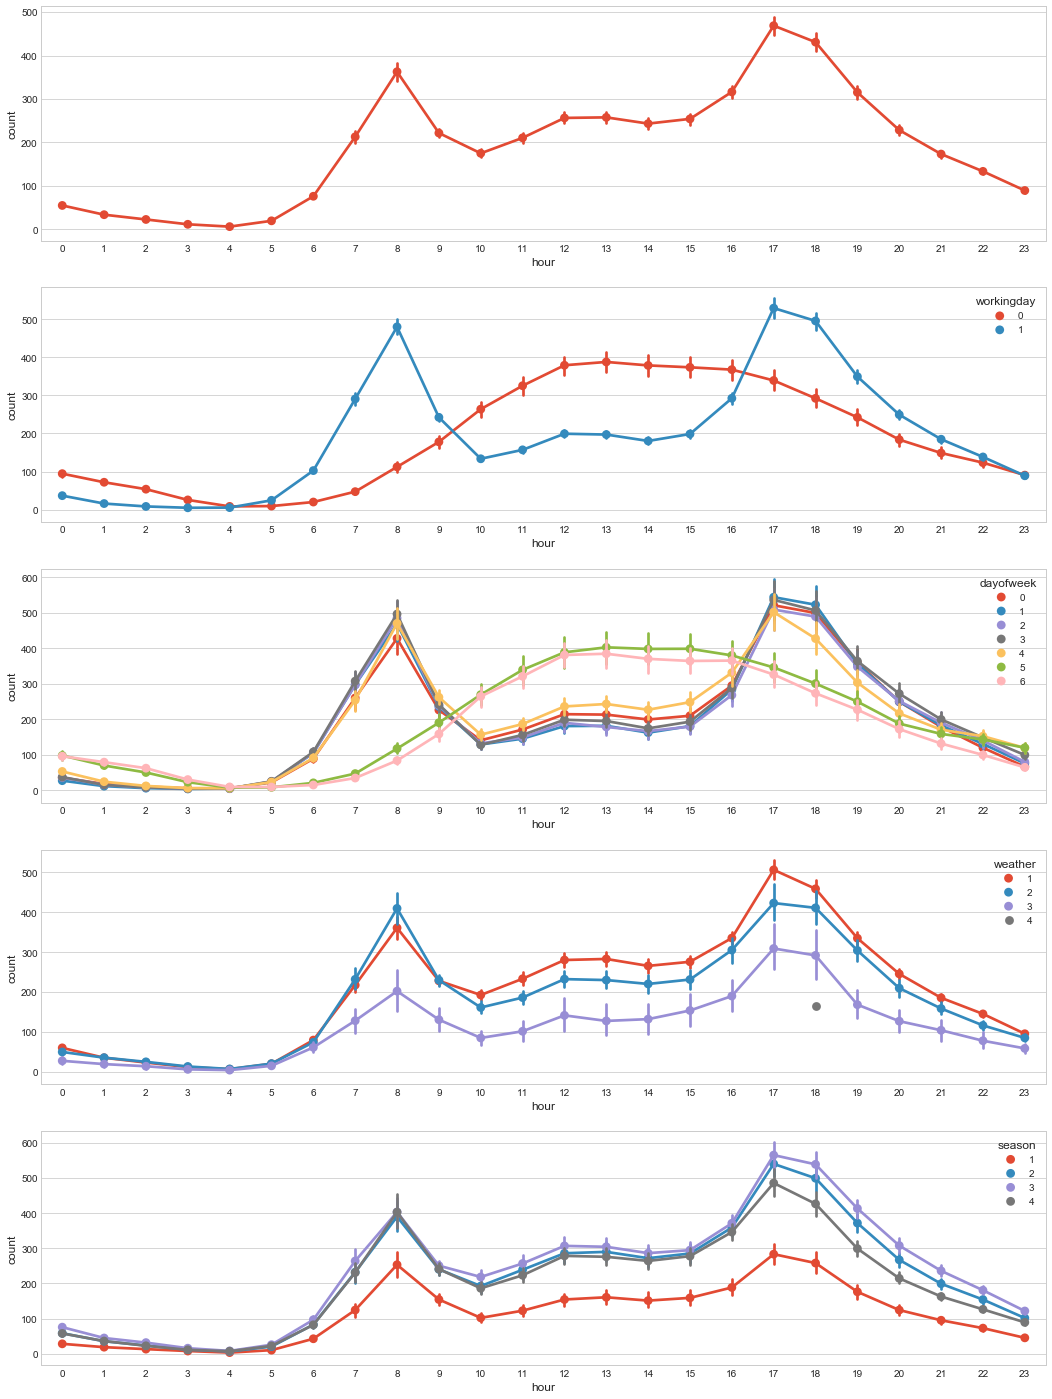

In [48]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)


sns.pointplot(data=train_df, x='hour', y='count', ax=ax1)
sns.pointplot(data=train_df, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train_df, x='hour', y='count', hue='dayofweek',ax=ax3)
sns.pointplot(data=train_df, x='hour', y='count', hue='weather',ax=ax4)
sns.pointplot(data=train_df, x='hour', y='count', hue='season', ax=ax5)

### # of rent in different features(season, weather, working days)
### depending on levels # of rent different

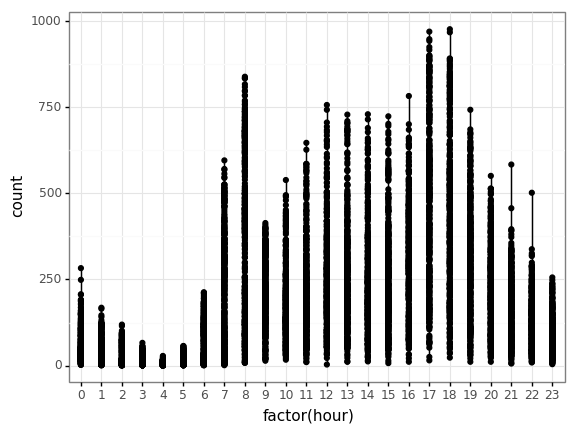

<ggplot: (137182557679)>

In [52]:
(ggplot(train_df, aes("factor(hour)", "count")) + geom_point() + geom_line() + theme_bw())

In [54]:
corr_mat = train_df[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corr_mat = corr_mat.corr(method="spearman")

print(corr_mat)

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.987128  0.573034    0.352174 -0.046854  -0.005535   
atemp       0.987128  1.000000  0.571588    0.350577 -0.042028  -0.036350   
casual      0.573034  0.571588  1.000000    0.775785 -0.378254   0.135040   
registered  0.352174  0.350577  0.775785    1.000000 -0.332785   0.131011   
humidity   -0.046854 -0.042028 -0.378254   -0.332785  1.000000  -0.324447   
windspeed  -0.005535 -0.036350  0.135040    0.131011 -0.324447   1.000000   
count       0.407989  0.406562  0.847378    0.988901 -0.354049   0.135777   

               count  
temp        0.407989  
atemp       0.406562  
casual      0.847378  
registered  0.988901  
humidity   -0.354049  
windspeed   0.135777  
count       1.000000  


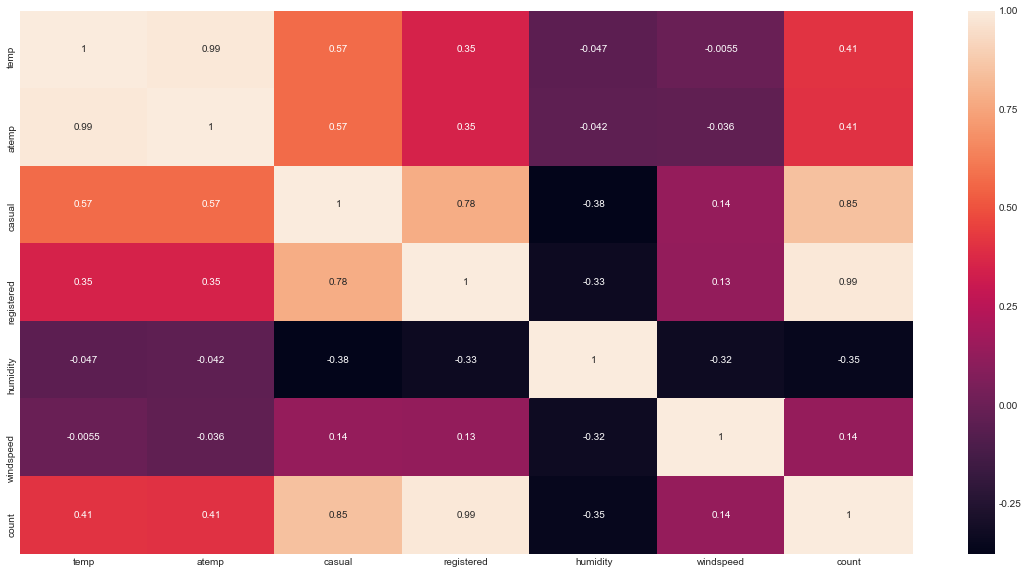

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_mat, annot=True)

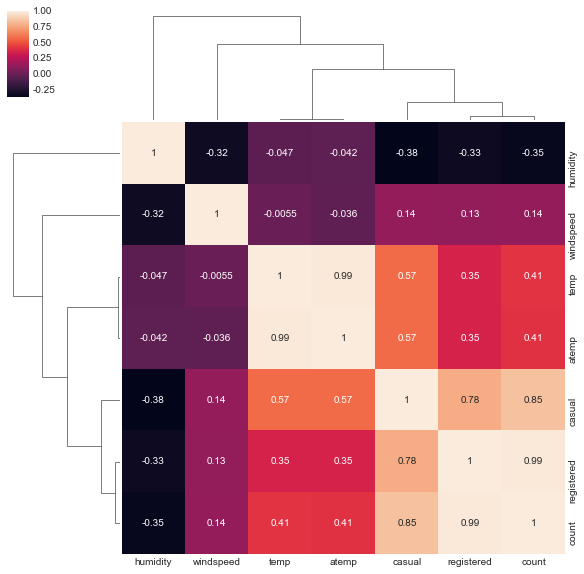

In [58]:
sns.clustermap(corr_mat, annot=True)

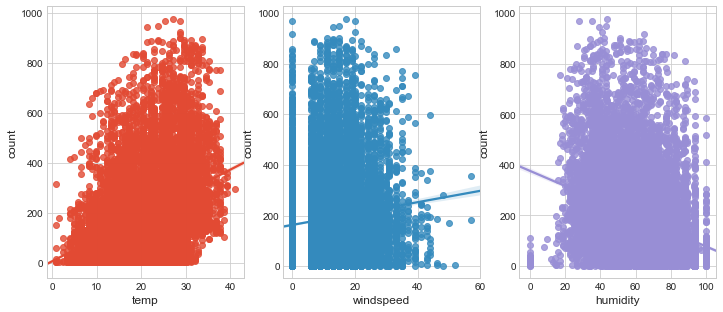

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)

fig.set_size_inches(12,5)

sns.regplot(x='temp', y="count", data=train_df, ax=ax1)
sns.regplot(x='windspeed', y="count", data=train_df, ax=ax2)
sns.regplot(x='humidity', y="count", data=train_df, ax=ax3)

In [64]:
def concat_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train_df["year_month"] = train_df["datetime"].apply(concat_year_month)
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,2011-1


In [73]:
print(train_df.iloc[0,0].year, train_df.iloc[0,0].month)


2011 1


c:\python3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


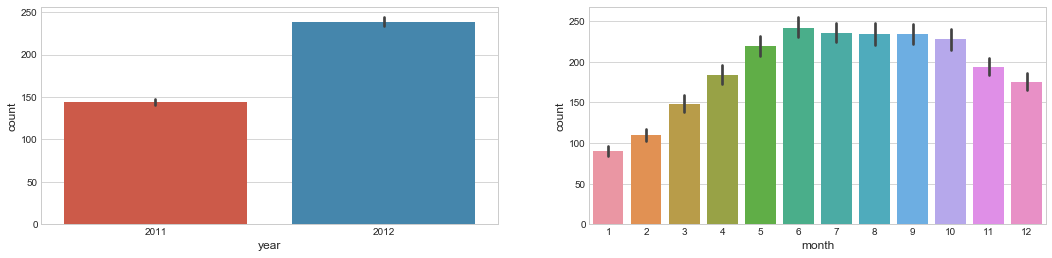

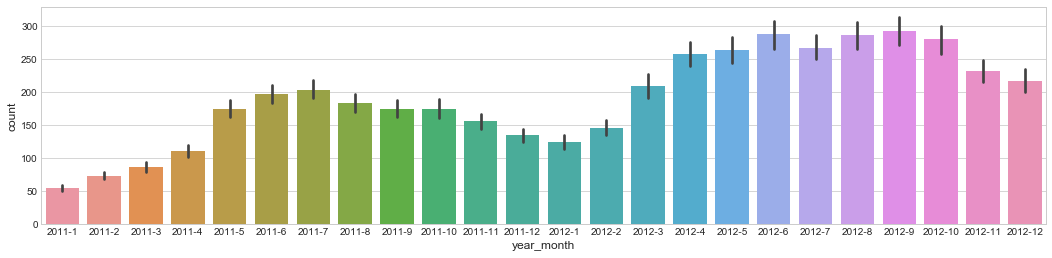

In [76]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

fig.set_size_inches(18,4)

sns.barplot(data=train_df, x="year", y="count", ax=ax1)
sns.barplot(data=train_df, x="month", y="count", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train_df, x='year_month', y='count', ax=ax3)

In [78]:
trainWithoutOutliers = train_df[np.abs(train_df["count"] - train_df["count"].mean()) <= (3*train_df["count"].std())]

print(train_df.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


c:\python3\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229767, 4.562423868087808, 0.958117678090961))

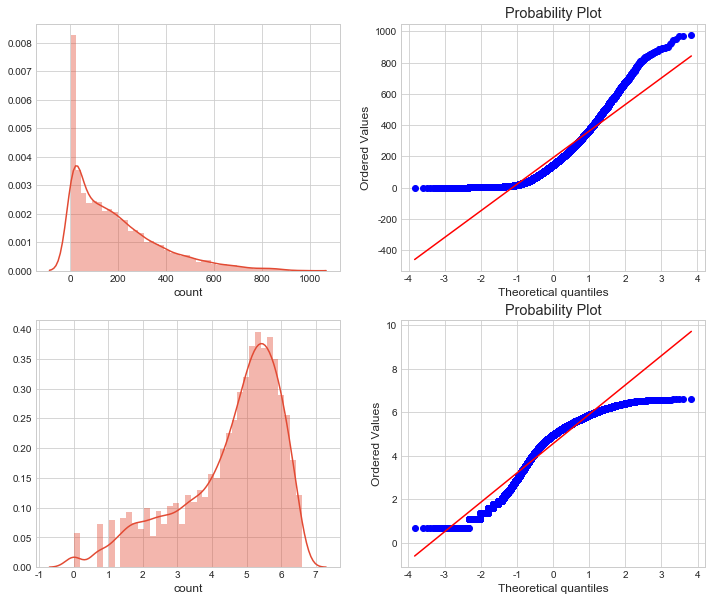

In [79]:
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(train_df["count"], ax=axes[0][0])
stats.probplot(train_df["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])